<a href="https://colab.research.google.com/github/Vasantha-Meghana/Predictive_Analytics_Projects/blob/Prediction_of_Optimal_Prices_for_Products/predictiv6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 Fiscal_Week_ID              59780
Store_ID                        0
Item_ID                         0
Price                           0
Item_Quantity                   0
Sales_Amount_No_Discount        0
Sales_Amount                    0
Competition_Price               0
dtype: int64

Number of duplicate rows: 10


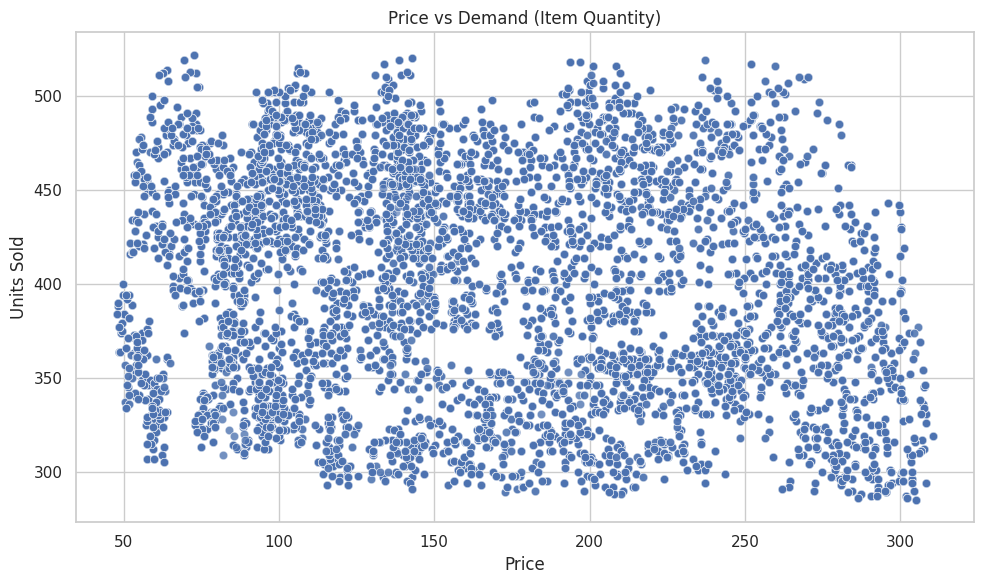

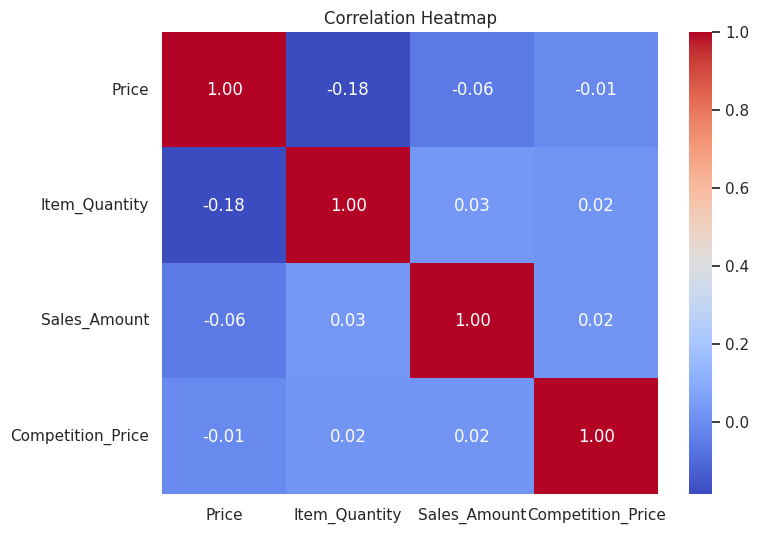

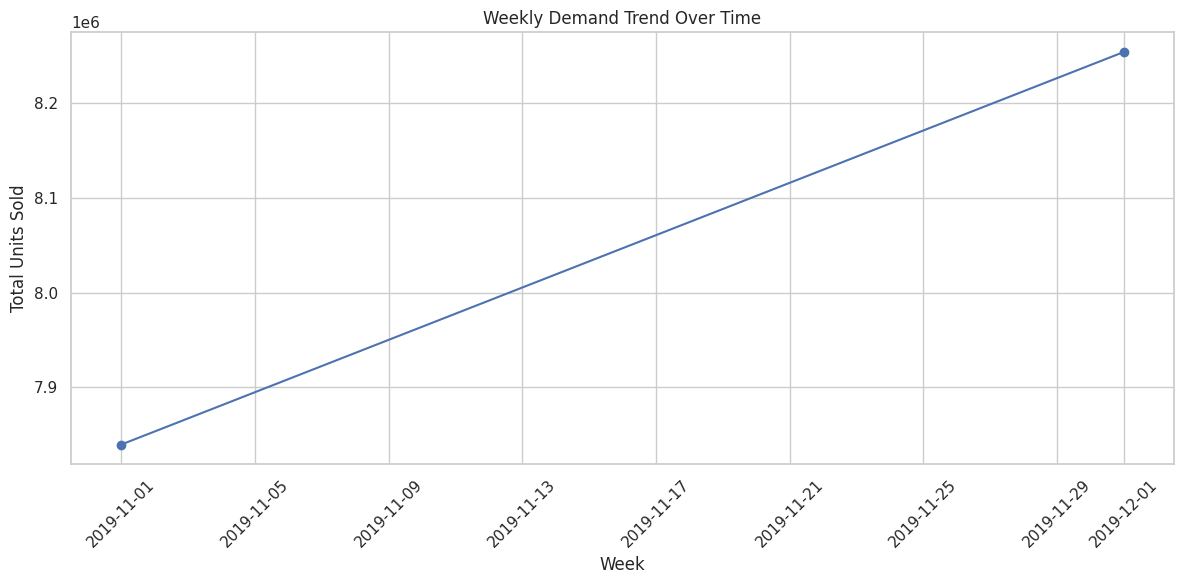

In [1]:
import pandas as pd

# Load dataset (if not already loaded)
df = pd.read_csv("Competition_Data.csv")

# Drop unnecessary column
df.drop(columns=['Index'], inplace=True)

# Convert Fiscal_Week_ID to datetime
df['Fiscal_Week_ID'] = pd.to_datetime(df['Fiscal_Week_ID'], errors='coerce')

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.dropna(subset=['Fiscal_Week_ID'])     # Remove rows missing date
df = df.drop_duplicates()                     # Remove duplicate rows
# Drop rows with missing Fiscal_Week_ID
df = df.dropna(subset=['Fiscal_Week_ID'])

# Drop duplicate rows
df = df.drop_duplicates()

# Reset index (optional for clean indexing)
df.reset_index(drop=True, inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Scatter plot of Price vs Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Item_Quantity', data=df, alpha=0.4)
plt.title('Price vs Demand (Item Quantity)')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df[['Price', 'Item_Quantity', 'Sales_Amount', 'Competition_Price']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

import matplotlib.pyplot as plt
import pandas as pd

# Group by week and sum item quantity
weekly_demand = df.groupby('Fiscal_Week_ID')['Item_Quantity'].sum().reset_index()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_demand['Fiscal_Week_ID'], weekly_demand['Item_Quantity'], marker='o')
plt.title('Weekly Demand Trend Over Time')
plt.xlabel('Week')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()